In [8]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel("E:/document/research/dr_research/code/eswa临时/award_1.xlsx")
for index, row in df.iterrows():
    try:
        file_path = f'E:/document/research/dr_research/code/eswa临时/result/{index}_similarity_distance.csv'
        linshi_df = pd.read_csv(file_path)
        a = 1
        b = 1
        linshi_df['innovation'] = (1-linshi_df['similarity'])/2
        innovation = linshi_df["innovation"].sum()
        df.loc[index, 'innovation'] = innovation
    except FileNotFoundError as e:
        continue
    
output_file = "E:/document/research/dr_research/code/eswa临时/award_1_novelty.xlsx"
df.to_excel(output_file, index=False)

In [ ]:
import pandas as pd
df = pd.read_excel("E:/document/research/dr_research/code/eswa临时/noaward_1_novelty.xlsx")
for index, row in df.iterrows():
    try:
        file_path = f'E:/document/non_result/{index}_similarity_distance.csv'
        linshi_df = pd.read_csv(file_path)
        a = 1
        b = 1
        linshi_df['innovation'] = (1-linshi_df['similarity'])/2
        innovation = linshi_df["innovation"].sum()
        df.loc[index, 'innovation'] = innovation
    except FileNotFoundError as e:
        continue
    
output_file = "E:/document/research/dr_research/code/eswa临时/noaward_1_novelty.xlsx"
df.to_excel(output_file, index=False)

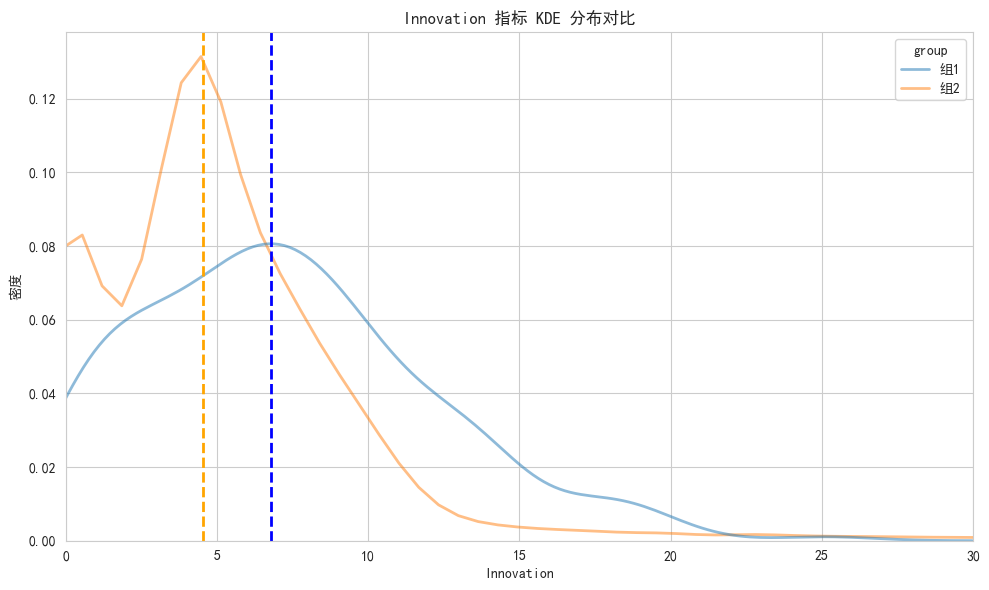

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# 假设你已经读取了你的 df 文件
df = pd.read_excel("E:/document/research/dr_research/code/eswa临时/award_1_novelty.xlsx")  # 如果还没读入
df = df['innovation'].dropna()

df1 = pd.read_excel("E:/document/research/dr_research/code/eswa临时/noaward_1_novelty.xlsx")  # 如果还没读入
df1 = df1['innovation'].dropna()

df_labeled = pd.DataFrame({'innovation': df, 'group': '组1'})
df1_labeled = pd.DataFrame({'innovation': df1, 'group': '组2'})

# 合并数据
df_all = pd.concat([df_labeled, df1_labeled], ignore_index=True)

# 绘制 KDE 分布图（标准化密度）
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_all,
    x='innovation',
    hue='group',
    fill=False,
    common_norm=False,  # 🔑 核心：每组独立归一化
    alpha=0.5,
    linewidth=2
)
median_won = df.median()
median_not_won = df1.median()
plt.axvline(median_won, color='blue', linestyle='--', linewidth=2, label='获奖 中位数')
plt.axvline(median_not_won, color='orange', linestyle='--', linewidth=2, label='未获奖 中位数')

plt.xlim(left=0,right=30)
plt.title('Innovation 指标 KDE 分布对比')
plt.xlabel('Innovation')
plt.ylabel('密度')
plt.grid(True)
plt.tight_layout()
plt.show()

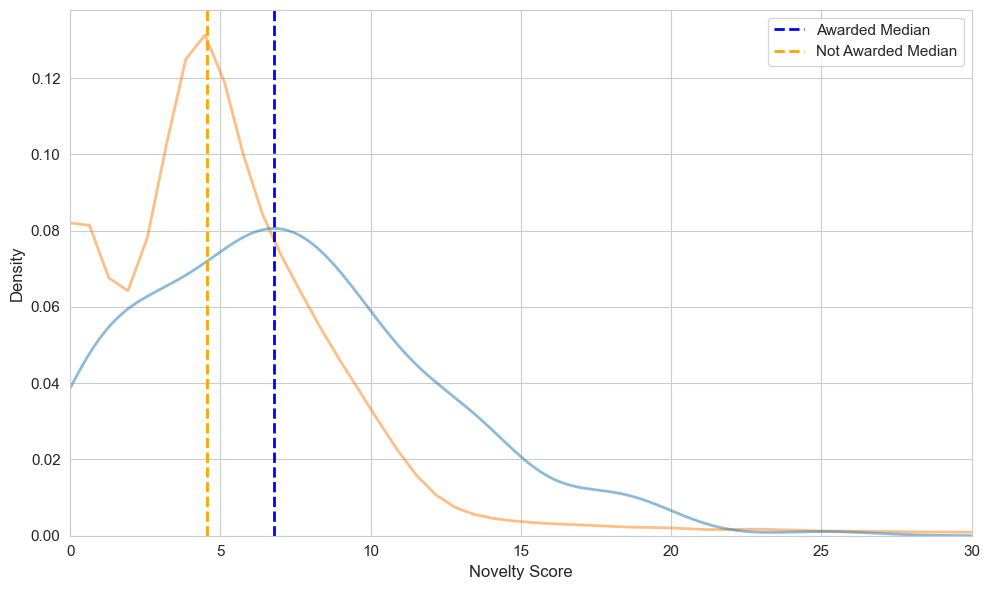

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("E:/document/research/dr_research/code/eswa临时/award_1_novelty.xlsx")  # 如果还没读入
df = df['innovation'].dropna()

df1 = pd.read_excel("E:/document/research/dr_research/code/eswa临时/noaward_1_novelty.xlsx")  # 如果还没读入
df1 = df1['innovation'].dropna()

df_labeled = pd.DataFrame({'innovation': df, 'group': 'Awarded'})
df1_labeled = pd.DataFrame({'innovation': df1, 'group': 'Not Awarded'})
df_all = pd.concat([df_labeled, df1_labeled], ignore_index=True)

# Calculate medians
median_awarded = df.median()
median_not_awarded = df1.median()

# Plot KDE distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_all,
    x='innovation',
    hue='group',
    fill=False,
    common_norm=False,
    alpha=0.5,
    linewidth=2,
    clip=(0, None)  # Prevent KDE from going below 0
)

# Add vertical lines for medians
plt.axvline(median_awarded, color='blue', linestyle='--', linewidth=2, label='Awarded Median')
plt.axvline(median_not_awarded, color='orange', linestyle='--', linewidth=2, label='Not Awarded Median')



# Optional: limit x-axis range (adjust right= value as needed)
plt.xlim(left=0, right=30)  # Set your preferred max value

# Add labels and legend
#plt.title('Distribution of Innovation Score by Award Status')
plt.xlabel('Novelty Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=11)                     
plt.yticks(fontsize=11)   
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('innovation_kde.png', dpi=300, bbox_inches='tight')
plt.show()